In [1]:
import numpy as np

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
pd.DataFrame({'Actual': y_test.values[:5],
              'Predicted': y_pred[:5]})

,Actual,Predicted
0,0.47700,0.719123
1,0.45800,1.764017
2,5.00001,2.709659
3,2.18600,2.838926
4,2.78000,2.604657


In [11]:
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Root Mean Squared Error (RMSE): 0.5558915986952444
R-squared (R²): 0.5757877060324508


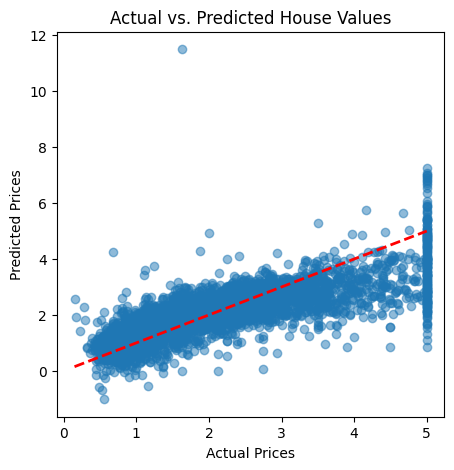

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Values")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [16]:
import pandas as pd

df = pd.DataFrame({
    'rooms': [2, 3, 1, 4, 3],
    'area': [80, 120, 60, 200, 150],
    'location': ['Ikeja', 'Lekki', 'Yaba', 'Lekki', 'Ikeja'],
    'rent': [250, 400, 200, 600, 420]
})

X = df[['rooms', 'area', 'location']]
y = df['rent']

In [17]:
num_features = ['rooms', 'area']
cat_features = ['location']

In [18]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)

In [19]:
from sklearn.linear_model import LinearRegression

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [20]:
model.fit(X, y)
pred = model.predict(X)
print(pred)

[250. 400. 200. 600. 420.]


In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

# load and split data
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.3f}")

Train RMSE: 0.00
Test RMSE: 0.704


In [28]:
for depth in [2, 4, 6, 10, 20]:
  tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
  tree.fit(X_train, y_train)
  y_pred = tree.predict(X_test)
  rmse = mean_squared_error(y_test, y_pred)
  print(f"Depth: {depth}, RMSE: {rmse:.3f}")

Depth: 2, RMSE: 0.754
Depth: 4, RMSE: 0.584
Depth: 6, RMSE: 0.497
Depth: 10, RMSE: 0.415
Depth: 20, RMSE: 0.489


In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

model = DecisionTreeRegressor(random_state=42)
scores = cross_val_score(model, X, y, cv=5, scoring="neg_root_mean_squared_error")

print("Cross-val RMSE scores:", -scores)
print("Average RMSE:", -scores.mean())

Cross-val RMSE scores: [0.88499419 0.82841568 0.89824089 0.94694252 0.92030391]
Average RMSE: 0.8957794382630011


In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 4, 6, 8, 10, 12],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
grid.fit(X, y)

print("Best params:", grid.best_params_)
print("Best RMSE:", -grid.best_score_)

Best params: {'max_depth': 8, 'min_samples_split': 5}
Best RMSE: 0.7786985567484347


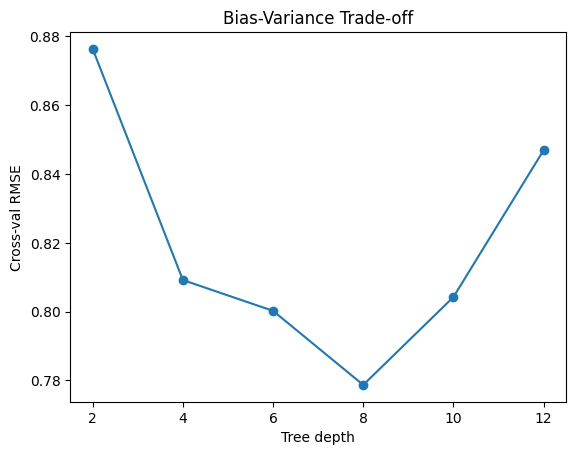

In [31]:
import matplotlib.pyplot as plt

depths = [2, 4, 6, 8, 10, 12]
rmses = [-cross_val_score(
    DecisionTreeRegressor(max_depth=d, random_state=42),
    X, y, cv=5, scoring="neg_root_mean_squared_error"
).mean() for d in depths]

plt.plot(depths, rmses, marker='o')
plt.xlabel("Tree depth"); plt.ylabel("Cross-val RMSE")
plt.title("Bias-Variance Trade-off")
plt.show()

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()
df.describe()
df.corr(numeric_only=True)['MedHouseVal'].sort_values(ascending=False)

,MedHouseVal
MedHouseVal,1.000000
MedInc,0.688075
AveRooms,0.151948
HouseAge,0.105623
AveOccup,-0.023737
Population,-0.024650
Longitude,-0.045967
AveBedrms,-0.046701
Latitude,-0.144160


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_features = df.columns.drop('MedHouseVal')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features)
    ]
)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

In [4]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

for name, base_model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', base_model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: RMSE: {rmse:.3f}, R²={r2:.3f}")

Linear Regression: RMSE: 0.556, R²=0.576
Decision Tree: RMSE: 0.494, R²=0.623
Random Forest: RMSE: 0.255, R²=0.805


In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [5, 10, 15, None]
}
grid = GridSearchCV(Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
]),
    param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
grid.fit(X, y)

print("Best params:", grid.best_params_)
print("Best RMSE:", -grid.best_score_)

# Get the best model
best_model = grid.best_estimator_

# Calculate feature importances
# Access the regressor step of the pipeline
regressor = best_model.named_steps['model']
# Access the preprocessor step of the pipeline
preprocessor_step = best_model.named_steps['preprocess']

# Get feature names after one-hot encoding (if any) - for simplicity, assuming no categorical features after previous steps
# In this specific case with only numerical features, this is straightforward.
# If there were categorical features processed by OneHotEncoder,
# you would need to get the feature names from the OneHotEncoder.
feature_names = X_train.columns

importances = regressor.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)

# Evaluate the best model on the training and test sets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


print(f"\nTrain RMSE: {train_rmse:.3f}, Train R²: {train_r2:.3f}")
print(f"Test RMSE: {test_rmse:.3f}, Test R²: {test_r2:.3f}")

Best params: {'model__max_depth': None, 'model__n_estimators': 100}
Best RMSE: 0.6506479601268903

Feature Importances:
      feature  importance
0      MedInc    0.520037
5    AveOccup    0.136406
6    Latitude    0.092856
7   Longitude    0.092694
1    HouseAge    0.052964
2    AveRooms    0.044513
4  Population    0.031232
3   AveBedrms    0.029299

Train RMSE: 0.186, Train R²: 0.974
Test RMSE: 0.188, Test R²: 0.973


In [ ]:
Model Summary:

• Best model: Random Forest (100 trees (n_estimators), max_depth = None)

• Test RMSE ≈ 0.188 → ~$18.8k average error

• R² ≈ 0.973 → Model explains 97.3 % of price variance (Great fit)

• Top features: Median Income, Average Occupancy, Latitude, Longitude

• Comment: Model shows slight overfitting, performing better on the training data than on unseen test data - may improve with max_depth constraint or regularisation.


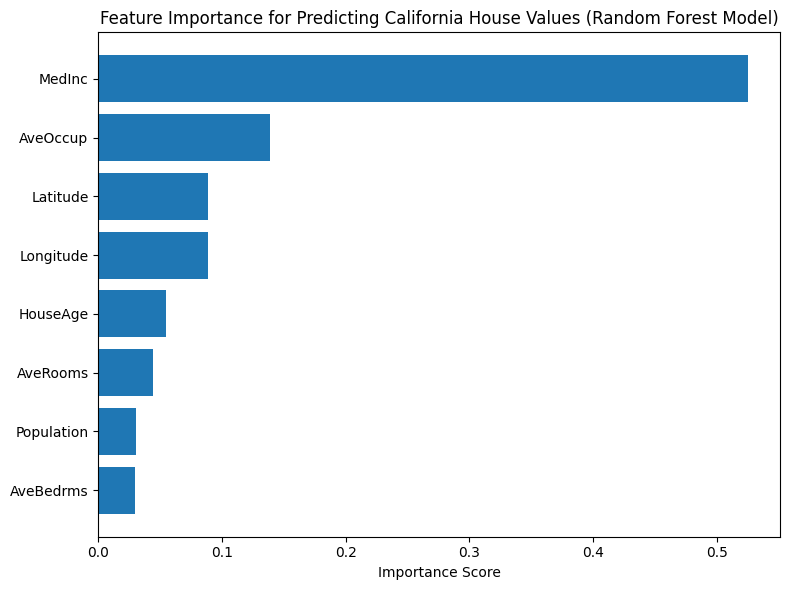

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# Load data
data = fetch_california_housing(as_frame=True)
df = data.frame
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Preprocessor
num_features = X.columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), num_features)]
)

# Pipeline
rf_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42))
])

rf_pipe.fit(X_train, y_train)

# prepend 'num__' when using ColumnTransformer
rf = rf_pipe.named_steps['model']

try:
    feature_names = rf_pipe.named_steps['preprocess'].get_feature_names_out()
    feature_names = [name.replace("num__", "") for name in feature_names]
except:
    feature_names = num_features


importances = rf.feature_importances_
order = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.barh(np.array(feature_names)[order], importances[order])
plt.title("Feature Importance for Predicting California House Values (Random Forest Model)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

Test RMSE: 0.255169737347244
Test R²: 0.8052747336256919


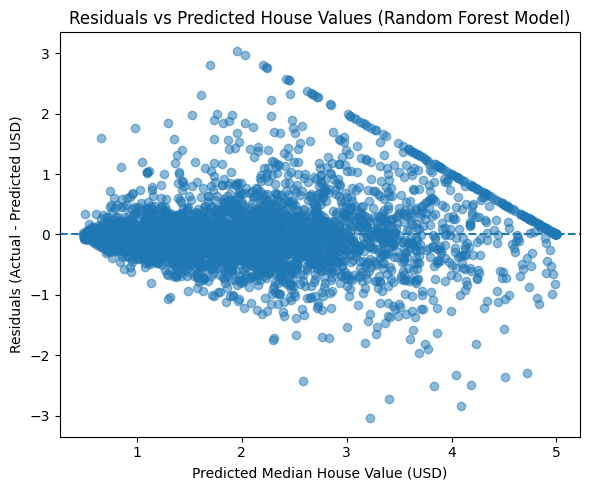

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = rf_pipe.predict(X_test)
residuals = y_test.values - y_pred

print("Test RMSE:", mean_squared_error(y_test, y_pred))
print("Test R²:", r2_score(y_test, y_pred))

plt.figure(figsize=(6,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, linestyle='--')
plt.title("Residuals vs Predicted House Values (Random Forest Model)")
plt.xlabel("Predicted Median House Value (USD)")
plt.ylabel("Residuals (Actual - Predicted USD)")
plt.tight_layout()
plt.show()